# Assignment 4 - Landon Burleson

## Problem 1 - Naive Bayes 

The following is the calculations used to find the conditional probability for the all features in
the table data set.

To find the conditional probability of the continuous values, the following Gaussian Naive Bayes
formula is used: 

$$P(house) = 7 / 20 = 0.35$$
$$P(condo) = 6 / 20 = 0.30$$
$$P(apartment) = 7 / 20 = 0.35$$

$$P(X | C = c_i) = \frac{1}{\sqrt{2*\pi*\sigma}} \exp{\frac{(-c_i - \mu)^2}{2\sigma^2}}$$

Finding the variance and mean of the local price values for the three categories is given as the
following: 

$$\mu_{house(local_price)} = \frac{(5.02 + 5.60 + 5.83 + 5.30 + 6.27 + 5.60 + 6.70)}{7}  = 5.76 $$
$$\mu_{condo(local_price)} = \frac{(4.54 + 3.89 + 5.90 + 16.42 + 5.96 + 7.78)}{6} = 7.415$$
$$\mu_{apartment(local_price)} = \frac{(4.92 + 4.56 + 5.06 + 14.46 + 5.05 + 8.25 + 9.04)}{7} = 7.33$$

Variance for the local price is found with the following formula:
$$\sigma^2 = \frac{1}{N}\sum_{i=1}^N (X_i - \mu)^2$$

$$\sigma^{2}_{house(local_price)} = \frac{1}{7}\sum_{i=1}^7 (X_i - 5.76)^2 = 13.07543601$$
$$\sigma^{2}_{condo(local_price)} = \frac{1}{6}\sum_{i=1}^6 (X_i - 7.415)^2 = 21.26360681$$
$$\sigma^{2}_{apartment(local_price)} = \frac{1}{7}\sum_{i=1}^7 (X_i - 7.33)^2 = 0.325038263$$

The following table shows the mean and variance for the apartment category:

### House Category Statistics
|            | local price | Bathrooms | Land Area | Living Area | Garages | # Rooms | # Bedrooms | Age      |
|------------|-------------|-----------|-----------|-------------|---------|---------|------------|----------|
| $\mu$      | 5.7607      | 1.0714    | 6.6309    | 1.3917      | 1.0714  | 6.1428  | 3.0000     | 34.2857  |
| $\sigma^2$ | 0.3250      | 0.0357    | 5.0578    | 0.0453      | 0.7023  | 0.4761  | 0.3333     | 161.9047 |

### Condo Category Statistics
|            | local price | Bathrooms | Land Area | Living Area | Garages | # Rooms | # Bedrooms | Age      |
|------------|-------------|-----------|-----------|-------------|---------|---------|------------|----------|
| $\mu$      | 7.4159      | 1.3333    | 6.0246    | 1.5533      | 1.3333  | 6.8333  | 3.3333     | 39.6667  |
| $\sigma^2$ | 21.2636     | 0.3666    | 6.4758    | 0.8527      | 0.2666  | 2.5666  | 0.6667     | 194.6667 |

### Apartment Category Statistics

|            | local price | Bathrooms | Land Area | Living Area | Garages | # Rooms | # Bedrooms | Age      |
|------------|-------------|-----------|-----------|-------------|---------|---------|------------|----------|
| $\mu$      | 7.3327      | 1.2857    | 6.1038    | 1.5050      | 1.2142  | 6.8571  | 3.4285     | 38.7142  |
| $\sigma^2$ | 13.0754     | 0.3214    | 10.6178   | 0.4957      | 0.4880  | 1.8095  | 0.9523     | 215.5714 |

Utilizing the above statistics, we can make a prediction using the MAP operation:
$$P(house|X) = P(house) * P(house | local price = x_i) * P(house | Bathrooms = x_i) * P(house | land
area = x_i) * P(house | Living Area = x_i) * P(house | Garages = x_i) * P(house | Rooms = x_i) *
P(house | Bedrooms = x_i) * P(house | Age = x_i)$$ 

$$P(condo|X) = P(condo) * P(condo | local price = x_i) * P(condo | Bathrooms = x_i) * P(condo | land
area = x_i) * P(condo | Living Area = x_i) * P(condo | Garages = x_i) * P(condo | Rooms = x_i) *
P(condo | Bedrooms = x_i) * P(condo | Age = x_i)$$ 

$$P(apartment|X) = P(apartment) * P(apartment | local price = x_i) * P(apartment | Bathrooms = x_i) * P(apartment | land
area = x_i) * P(apartment | Living Area = x_i) * P(apartment | Garages = x_i) * P(apartment | Rooms = x_i) *
P(apartment | Bedrooms = x_i) * P(apartment | Age = x_i)$$ 


In [22]:
#Adding in the necessary modules needed to complete Assignment 4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import tree 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


In [23]:
def readExcel():
	train = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Train', index_col = 0)
	test = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Test', index_col = 0)
	return train, test

def getAverage(dict, key):
    return dict[key]

def getVariance(dict, key):
    return dict[key]

def naiveBayesGauss(val, mean, variance):
	return (1 / np.sqrt(2 * np.pi * np.sqrt(variance))) * np.exp((val - mean) / (2*variance))

train, test = readExcel()

#The following dictionaries are used for the conditional probability value calculations.
prob = {'House' : 7/20, 
        'Condo' : 7/20, 
        'Apartment' : 6/20}

house_mean = {'Local Price' : 5.7607,
         'Bathrooms' : 1.0714,
         'Land Area' : 6.6309,
         'Living area' : 1.3917,
         '# Garages' : 1.0714,
         '# Rooms' : 6.1428,
         '# Bedrooms' : 3.0000,
         'Age of home' : 34.2857}

house_var = {'Local Price' : 0.3250,
         'Bathrooms' : 0.0357,
         'Land Area' : 5.0578,
         'Living area' : 0.0453,
         '# Garages' : 0.7023,
         '# Rooms' : 0.4761,
         '# Bedrooms' : 0.3333,
         'Age of home' : 161.9047}

condo_mean = {'Local Price' : 7.4159,
         'Bathrooms' : 1.3333,
         'Land Area' : 6.0246,
         'Living area' : 1.5533,
         '# Garages' : 1.3333,
         '# Rooms' : 6.8333,
         '# Bedrooms' : 3.3333,
         'Age of home' : 39.6667}

condo_var = {'Local Price' : 21.2636,
         'Bathrooms' : 0.3666,
         'Land Area' : 6.4758,
         'Living area' : 0.8527,
         '# Garages' : 0.2666,
         '# Rooms' : 2.5666,
         '# Bedrooms' : 0.6667,
         'Age of home' : 194.6667}

apt_mean = {'Local Price' : 7.3327,
         'Bathrooms' : 1.2857,
         'Land Area' : 6.1038,
         'Living area' : 1.5050,
         '# Garages' : 1.2142,
         '# Rooms' : 6.8571,
         '# Bedrooms' :  3.4285,
         'Age of home' : 38.7142}

apt_var = {'Local Price' : 13.0754,
         'Bathrooms' : 0.3214,
         'Land Area' : 10.6178,
         'Living area' : 0.4957,
         '# Garages' :  0.4880,
         '# Rooms' :  1.8095,
         '# Bedrooms' : 0.9523,
         'Age of home' : 215.5714}

categories = ['House', 'Condo', 'Apartment']
MAP = []
values = test.to_numpy()

for i in range(test.shape[0]): #Cycle through test samples
    likelihood = np.zeros(3)
    for idx, j in enumerate(categories):
        p = prob[j]
        for k in range(test.shape[1]-1): #Cycle through the test features
            if j == 'House':
                likelihood[idx] = (likelihood[idx]*naiveBayesGauss(values[i, k],house_mean[test.columns[k]], house_var[test.columns[k]]))
            if j == 'Condo':
                likelihood[idx] = (likelihood[idx]*naiveBayesGauss(values[i, k],condo_mean[test.columns[k]], condo_var[test.columns[k]]))
            if j == 'Apartment':
                likelihood[idx] = (likelihood[idx]*naiveBayesGauss(values[i, k],apt_mean[test.columns[k]], apt_var[test.columns[k]]))
        likelihood[idx] = likelihood[idx] * p
        
    MAP.append(np.argmax(likelihood)) #Selects the highest probability of a class for a given sample.

predictions = []

for i in MAP:
    predictions.append(categories[i])    

print(predictions)                

['House', 'House', 'House', 'House', 'House']


## Problem 2 - Decision Trees


In [24]:
# Gather dataset for training the decision tree. 
feature_cols = ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']

X_train = train[feature_cols] # Features
Y_train = train['Construction type'] #Target variable

# Create test samples.
X_test = test[feature_cols]
Y_test = test['Construction type']

In [25]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(X_train.values , Y_train.values)

train_accuracy = clf.score(X_train.values , Y_train.values)

Y_pred = []
for i in range(X_test.shape[0]):
	Y_pred.append(clf.predict(X_test.values[i].reshape(1, -1))) 

print(f'Accuracy on Training: {train_accuracy * 100}%')
print(f'Accuracy on Testing: {metrics.accuracy_score(Y_test.values.reshape(-1,1), Y_pred) * 100}%')


Accuracy on Training: 100.0%
Accuracy on Testing: 40.0%


Accuracy on Training @ a depth of 1: 55.00000000000001%
Accuracy on Testing @ a depth of 1: 0.4%
Accuracy on Training @ a depth of 2: 75.0%
Accuracy on Testing @ a depth of 2: 0.6%
Accuracy on Training @ a depth of 3: 90.0%
Accuracy on Testing @ a depth of 3: 0.4%
Accuracy on Training @ a depth of 4: 95.0%
Accuracy on Testing @ a depth of 4: 0.4%
Accuracy on Training @ a depth of 5: 100.0%
Accuracy on Testing @ a depth of 5: 0.4%
Accuracy on Training @ a depth of 6: 100.0%
Accuracy on Testing @ a depth of 6: 0.4%


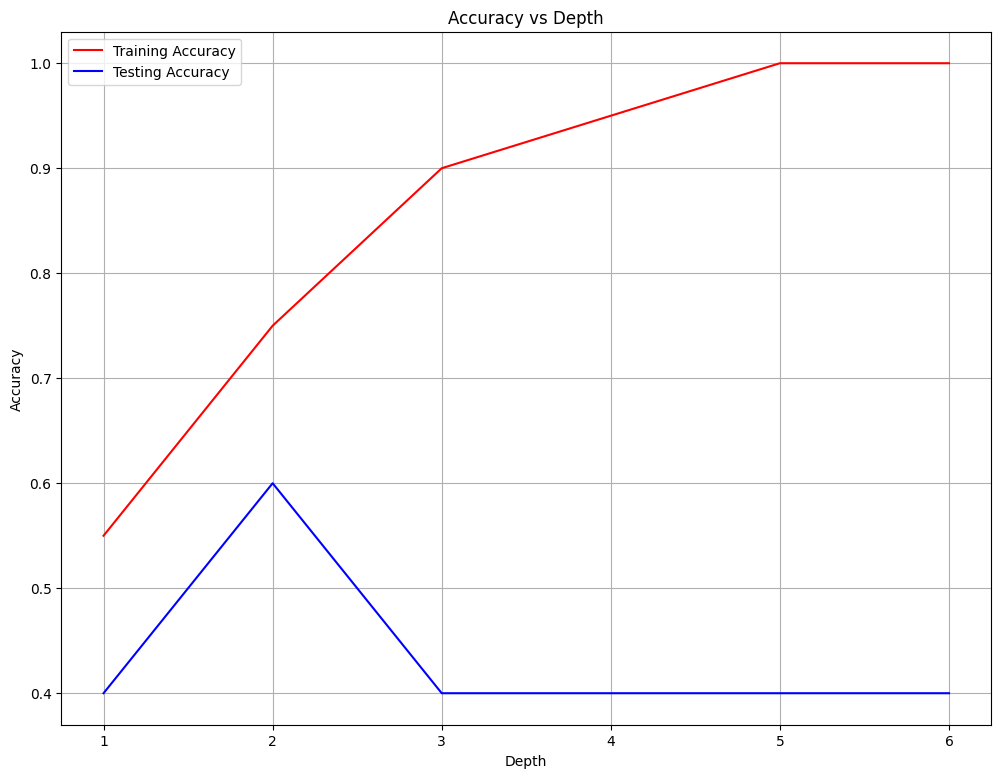

In [26]:

depth = [1, 2, 3, 4, 5, 6]
train_accuracy = []
test_accuracy = []

for d in depth:
	clf = tree.DecisionTreeClassifier(max_depth=d)
	clf = clf.fit(X_train.values , Y_train.values)

	train_accuracy.append(clf.score(X_train.values , Y_train.values))

	Y_pred = []
	for i in range(X_test.shape[0]):
		Y_pred.append(clf.predict(X_test.values[i].reshape(1, -1))) 

	test_accuracy.append(metrics.accuracy_score(Y_test.values.reshape(-1,1), Y_pred))

	print(f'Accuracy on Training @ a depth of {d}: {train_accuracy[-1] * 100}%')
	print(f'Accuracy on Testing @ a depth of {d}: {test_accuracy[-1]}%')

plt.figure(figsize=[12, 9])
plt.title("Accuracy vs Depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.plot(depth, train_accuracy, 'r', label="Training Accuracy") 
plt.plot(depth, test_accuracy, 'b', label="Testing Accuracy")
plt.legend()
plt.grid()
plt.show()

Accuracy on Training @ a depth of 2: 75.0%
Accuracy on Testing @ a depth of 2: 0.8%
|--- feature_7 <= 36.00
|   |--- feature_0 <= 8.41
|   |   |--- class: House
|   |--- feature_0 >  8.41
|   |   |--- class: Apartment
|--- feature_7 >  36.00
|   |--- feature_0 <= 4.55
|   |   |--- class: Condo
|   |--- feature_0 >  4.55
|   |   |--- class: Apartment



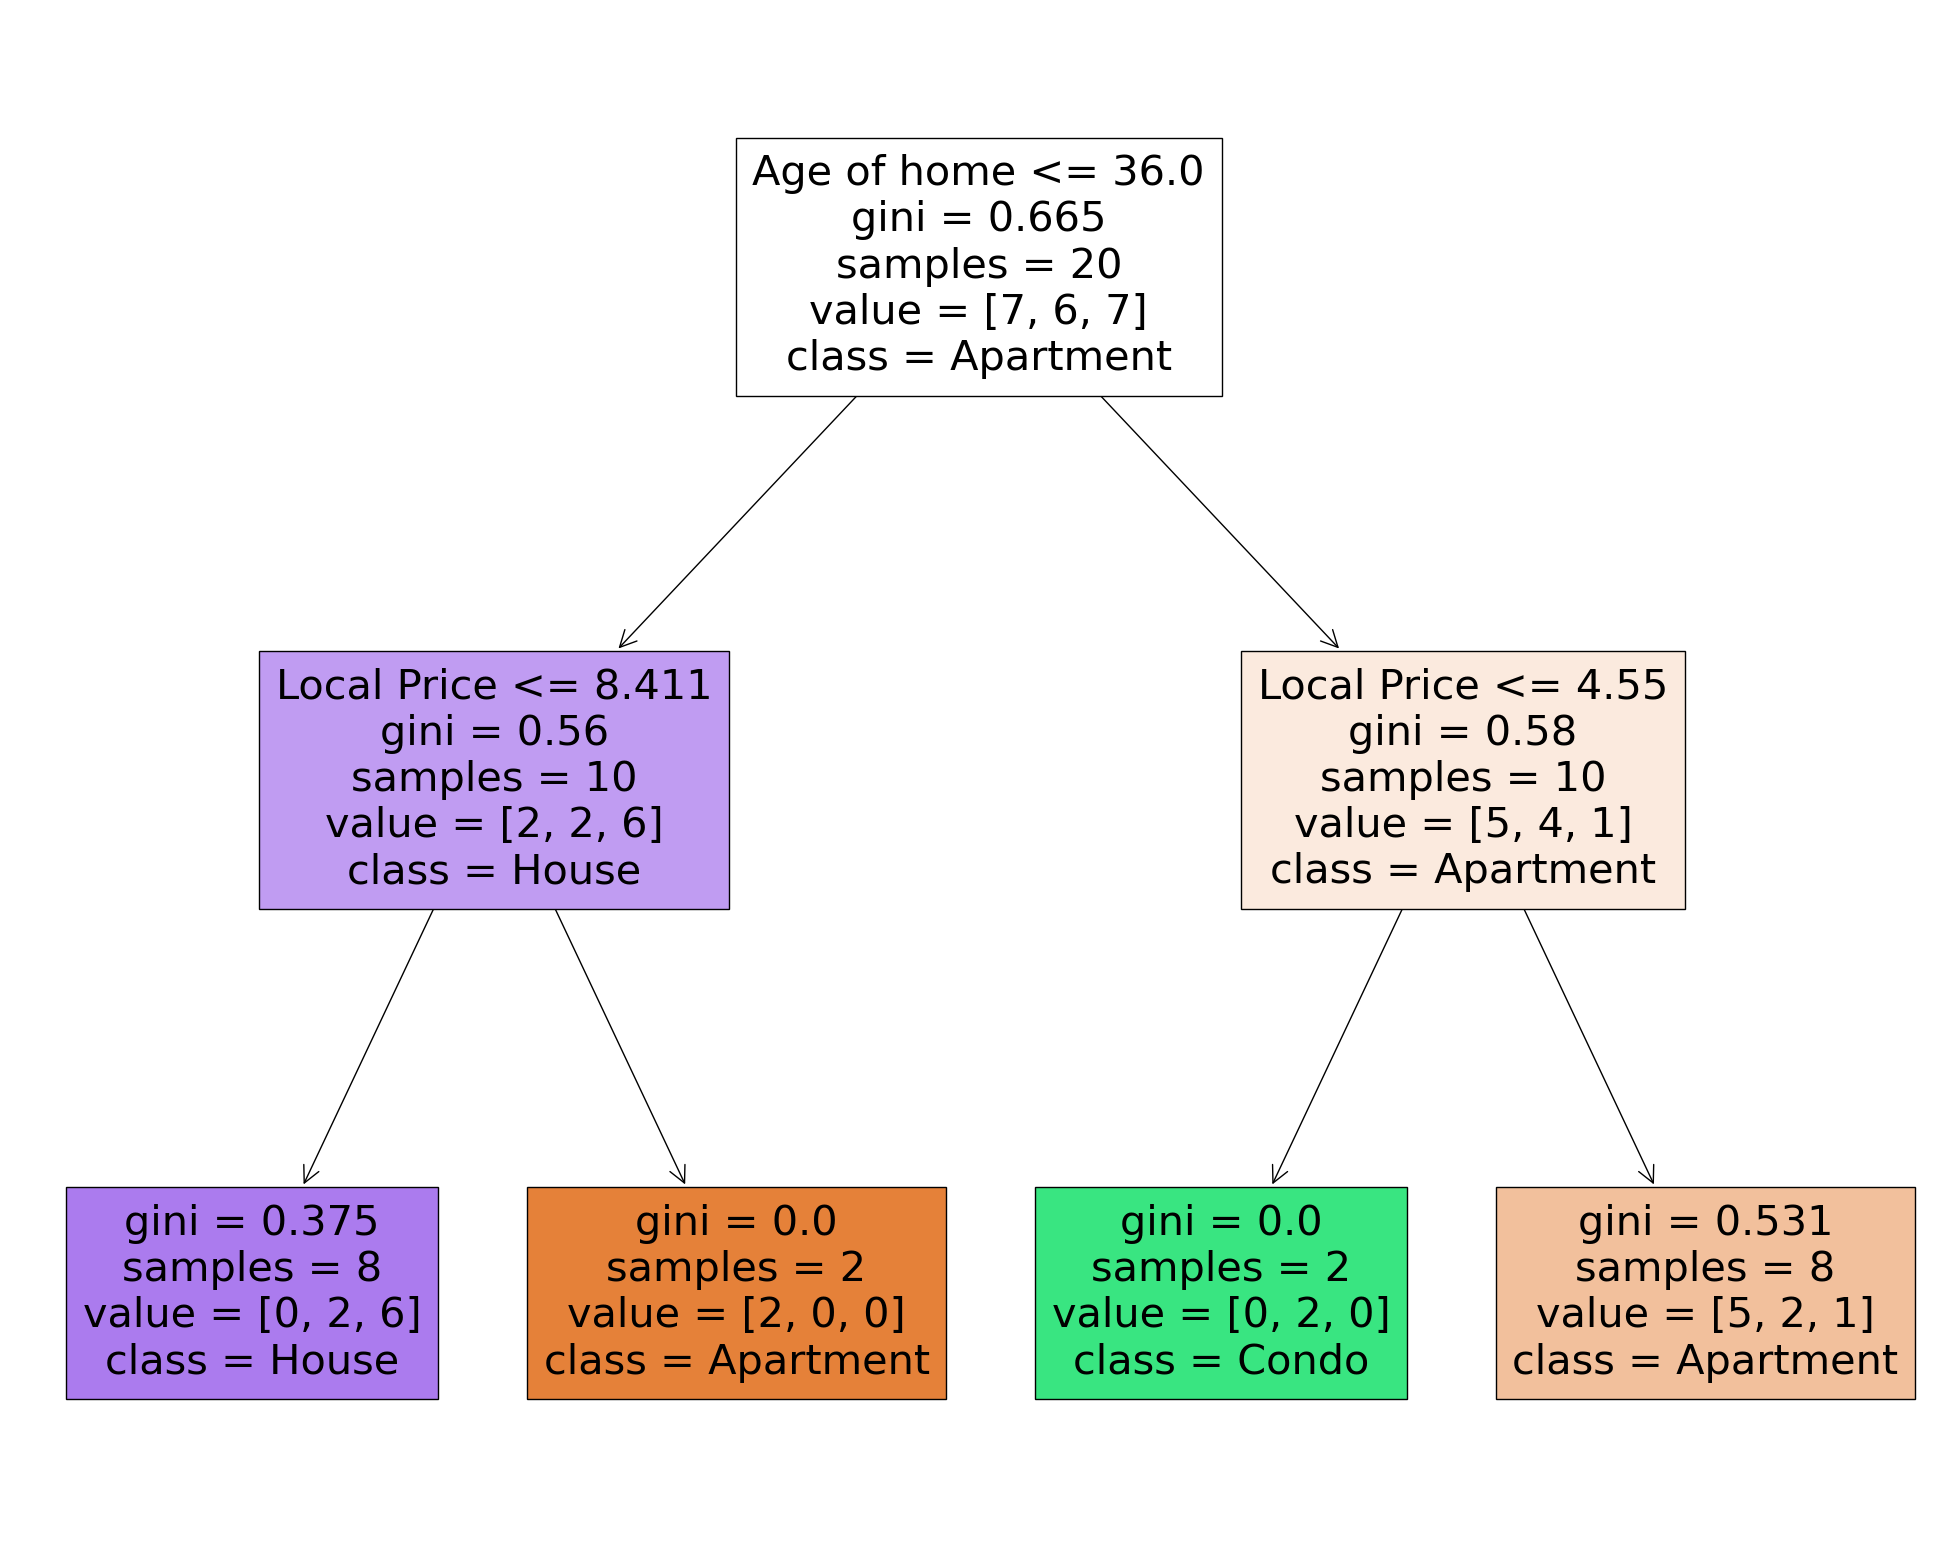

In [39]:
depth = 2
train_accuracy = []
test_accuracy = []

clf = tree.DecisionTreeClassifier(max_depth=depth)
model = clf.fit(X_train.values , Y_train.values)

train_accuracy.append(clf.score(X_train.values , Y_train.values))

Y_pred = []
for i in range(X_test.shape[0]):
    Y_pred.append(clf.predict(X_test.values[i].reshape(1, -1))) 

test_accuracy.append(metrics.accuracy_score(Y_test.values.reshape(-1,1), Y_pred))

print(f'Accuracy on Training @ a depth of {depth}: {train_accuracy[-1] * 100}%')
print(f'Accuracy on Testing @ a depth of {depth}: {test_accuracy[-1]}%')

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['Apartment', 'Condo', 'House'],
                   filled=True)
fig.savefig('tree.png')

txt = tree.export_text(clf)
print(txt)

### Problem 2 - Responses
1. The following are the responses to the default parameter questions: 
	1.  The accuracy on the **training** set is 100% in accordance to the values found above. This is due
	to decision trees always over-fitting to the data if the depth is not limited appropriately. 
   2.  The accuracy on the **test** data set is 40% according to the above value found. 
2. Restricting the depth of the tree will yield better results in terms of the testing data-set as
   we will be able to generalize the data more effectively and reduce the chance of the model
   over-fitting to the data. The best depth that was used was a depth of 2. This seemed to produce
   the best accuracy for the testing dataset with a reduced accuracy to the training data. 
3. The reason restricting the depth effects the classifier performance so much is due to the fact
   that without reducing the tree depth, the model will become over-fitted to the training data set
   and thus will not generalize appropriately based upon the test data set. This will cause the test
   data set to plateau at a certain level of accuracy.
4. Shown above is the graph of the tree classifier with a max depth set to 2. See the following
   graph to perform the inference of the following test vector: 

|Feature Name| Value       |
|------------|-------------|
| Local Price | 9.0384 |
|Bathrooms |1 |
| Land Area |7.8| 
|Living area |1.5 |
|# Garages |1.5| 
|# Rooms| 7| 
|# Bedrooms| 3|
|Age of Home| 23|

![TREE](tree_annotated.jpeg)

***

## Problem 3
See the following code for the KNN implementation

In [28]:
#Functions for the KNN algorithm
def euclidian(p1, p2):
	return np.linalg.norm(p1 - p2)

def KNN(query, data, k):
	dist = []

	for idx, row in enumerate(data):
		d = euclidian(query[:-1], row[:-1])

		dist.append((d, idx))

	# Sort in the Ascending order
	dist.sort()

	# Select the k nearest neighbors
	dist_sorted = dist[:k]

	# Using the indices in the dist matrix, we can predict what the most likely category the query
	# is.
	neighbors = []

	for d in dist_sorted:
		neighbors.append(data[d[1], -1])
	
	for neighbor in neighbors:
		if query[-1] in neighbor: #Sees if the accurate category is present in the neighbors. If it is, prediction is correct.
			prediction = 1
			break
		else:
			prediction = 0  # If the category is never found amongst the neighbors, the prediction has failed. 

	return dist, neighbors, prediction

Accuracy = [(1, 0.2), (2, 0.2), (3, 0.26666666666666666), (4, 0.3), (5, 0.36), (6, 0.4), (7, 0.45714285714285713), (8, 0.5), (9, 0.5333333333333333), (10, 0.58)]


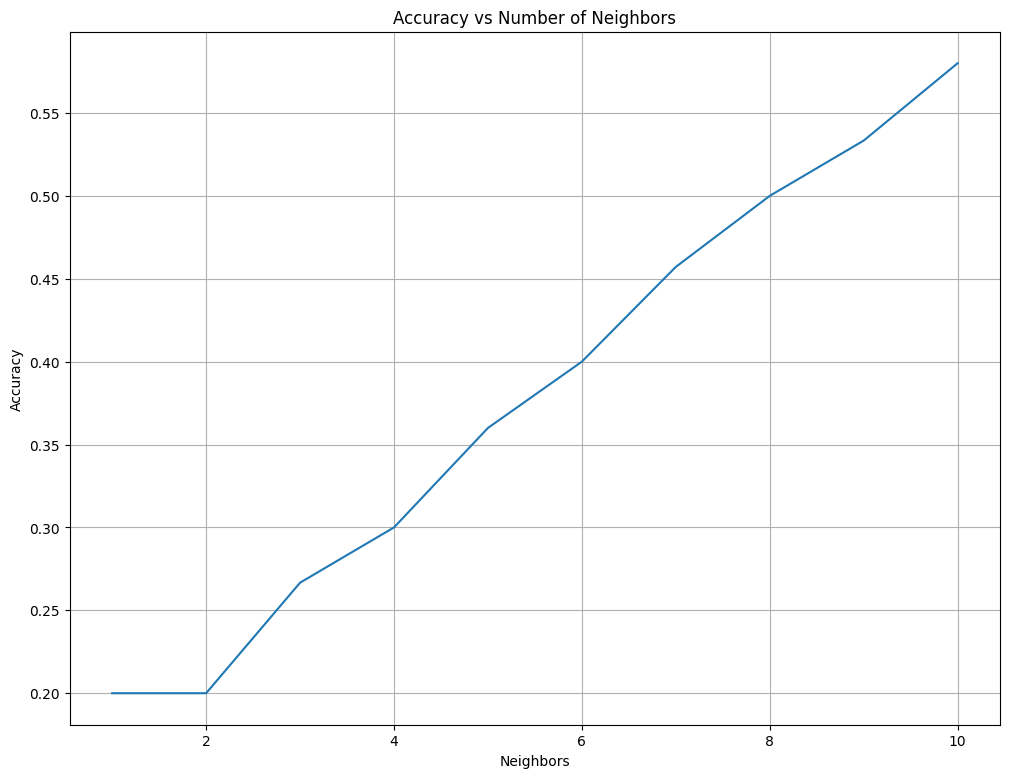

In [46]:
k = [1, 2, 3, 4, 5]
data = train.values
queries = test.values
predictions = []
accuracy = []

for k_c in k:
	for query in queries:
		distance, neighbors, prediction= KNN(query, data, k_c)
		predictions.append(prediction)

	accuracy.append((k_c, sum(predictions) / len(predictions)))  

x = []
acc = []

for i in accuracy:
	x.append(i[0])
	acc.append(i[1])

print(f'Accuracy = {accuracy}')

plt.figure(figsize=[12, 9])
plt.title("Accuracy vs Number of Neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.plot(x, acc)
plt.grid()
plt.show()
